<b>
Name : Anish Rajesh Adnani
<br>
USC ID : 4092610491
<br>
USC Email ID : adnani@usc.edu
<br>
Github Username : midnightbot
<br>
    </b>

<b> 1. Multi-class and Multi-Label Classification Using Support Vector Machines
 </b>

<b> 1. (a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics. uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29 . Choose 70% of the data randomly as the training set.</b>

In [1]:
## all imports
import pandas as pd  ## used for data manipulation
from sklearn.model_selection import train_test_split  ## used for train test split of data
import numpy as np  ## used for calculations
from sklearn.multiclass import OneVsRestClassifier  ## for multiclass classification
from sklearn.model_selection import GridSearchCV  ## used for finding optimal parameters
from sklearn.svm import SVC  ## used for support vector classifier
from sklearn.svm import LinearSVC  ## used for support vector classifier
from sklearn.model_selection import KFold  ## used for cross validation
from sklearn.metrics import accuracy_score  ## used to calculate Exact Match
from sklearn.metrics import hamming_loss  ## used to calculate hamming loss
from sklearn import preprocessing  ## used for data preprocessing
from imblearn.over_sampling import SMOTE  ## used for handling class imbalance
from sklearn.cluster import KMeans  ## used for clustering
from sklearn.metrics import silhouette_score  ##used for calculating silhouette_score
import statistics
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data_location = '../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv'

In [3]:
full_data = pd.read_csv(data_location)

In [4]:
display(full_data)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [5]:
train_data, test_data = train_test_split(full_data, test_size=0.3)

In [6]:
print("Train Data Shape ==> ",train_data.shape)

Train Data Shape ==>  (5036, 26)


In [7]:
print("Test Data Shape ==> ", test_data.shape)

Test Data Shape ==>  (2159, 26)


In [8]:
features = ["MFCCs_ "+str(x) if x < 10  else"MFCCs_"+str(x) for x in range(1,23)]
labels = ["Family", "Genus", "Species"]
print(features)

['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6', 'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12', 'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18', 'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22']


In [9]:
train_X = train_data[features]
train_Y = train_data[labels]

test_X = test_data[features]
test_Y = test_data[labels]

<b> 1. (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach</b>

<b> 1.(b) (i) Research exact match and hamming score/ loss methods for evaluating multi-
label classification and use them in evaluating the classifiers in this problem</b>

Exact Match Score
<br>
The metric is very simple as it sounds. 
<br>
Number of observations for which the actual set of labels correspond to the predicted set of labels
<br>
This is a strict all-or-nothing metric, even if we are off by one label the EM score will be 0
<br>
EM = 1 when all predicted labels match the exact labels
<br>

----------------------------
Hamming Loss
<br>
Hamming loss computes the average hamming distance between two set of samples
<br>
It is fraction of observations not predicted properly
<br>
Example : Observation has 10 labels, out of which 8 predicted correctly. Hamming distance = 2


<b> 1.(b) (ii) Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. 1 You are welcome to try to solve the problem with both standardized 2 and raw attributes and report the results. </b>

In [10]:
gamma_vals = [10**-4, 10**-3, 10**-2, 10**-1, 0.2, 0.5]
C_vals = [1,10,100,1000]

params = {'estimator__gamma': gamma_vals, 'estimator__C': C_vals}

svm_model = OneVsRestClassifier(SVC(kernel='rbf', tol=0.1))
grid_search_cv = GridSearchCV(svm_model, param_grid=params, cv = KFold(10))

In [11]:
def make_model_for_label(label):
    print("Making model for label ==> ", label)
    label_model = grid_search_cv.fit(train_X, train_Y[label])
    
    model_best_params = label_model.best_params_
    label_best_C = model_best_params['estimator__C']
    label_best_gamma = model_best_params['estimator__gamma']
    label_best_width = (1/np.sqrt(2*label_best_gamma))
    
    label_test_pred = label_model.predict(test_X)
    label_em_score = accuracy_score(label_test_pred, test_Y[label])
    label_hamming_loss = hamming_loss(label_test_pred, test_Y[label])
    
    return [label_best_C, label_best_gamma, label_best_width, label_em_score, label_hamming_loss], label_test_pred

In [12]:
ans = []
preds = []
for lbl in labels:
    temp1, temp2 = make_model_for_label(lbl)
    ans.append(temp1)
    preds.append(temp2)
    
print(ans)

Making model for label ==>  Family
Making model for label ==>  Genus
Making model for label ==>  Species
[[100, 0.5, 1.0, 0.9907364520611394, 0.009263547938860583], [100, 0.5, 1.0, 0.9879573876794813, 0.012042612320518759], [1000, 0.5, 1.0, 0.9861046780917091, 0.013895321908290875]]


In [13]:
for x in range(len(ans)):
    lbl = labels[x]
    bst_svm_penalty = ans[x][0]
    bst_svm_gamma = ans[x][1]
    bst_svm_width = ans[x][2]
    bst_em_loss = 1 - ans[x][3]
    bst_hamming_loss = ans[x][4]
    print("Label : ", lbl)
    print("Best SVM Penalty ==> ", bst_svm_penalty)
    print("Best SVM Gamma ==> ", bst_svm_gamma)
    print("Best Width for Gaussian Kernel ==> ", bst_svm_width)
    print("Exact Match Loss ==> ", bst_em_loss)
    print("Hamming Loss ==> ", bst_hamming_loss)
    print("-------------------------------------")
    

Label :  Family
Best SVM Penalty ==>  100
Best SVM Gamma ==>  0.5
Best Width for Gaussian Kernel ==>  1.0
Exact Match Loss ==>  0.009263547938860639
Hamming Loss ==>  0.009263547938860583
-------------------------------------
Label :  Genus
Best SVM Penalty ==>  100
Best SVM Gamma ==>  0.5
Best Width for Gaussian Kernel ==>  1.0
Exact Match Loss ==>  0.01204261232051873
Hamming Loss ==>  0.012042612320518759
-------------------------------------
Label :  Species
Best SVM Penalty ==>  1000
Best SVM Gamma ==>  0.5
Best Width for Gaussian Kernel ==>  1.0
Exact Match Loss ==>  0.013895321908290903
Hamming Loss ==>  0.013895321908290875
-------------------------------------


In [14]:
svm_avg_hamming_loss = sum([x[4] for x in ans])/3

crct = 0
for x in range(len(test_Y)):
    if (test_Y.iloc[x]['Family'] == preds[0][x] and test_Y.iloc[x]['Genus'] == preds[1][x] 
        and test_Y.iloc[x]['Species'] == preds[2][x]):
        crct+=1
        

svm_em_loss = 1 - (crct/len(test_Y))
print("Average Hamming Loss ==> ", svm_avg_hamming_loss)
print("Average Exact Match Loss ==> ", svm_em_loss)

Average Hamming Loss ==>  0.011733827389223406
Average Exact Match Loss ==>  0.01713756368689212


In [15]:
## standardizing all features
stds = preprocessing.StandardScaler()
stds = stds.fit(train_X)

scaled_train_X = stds.transform(train_X)
scaled_test_X = stds.transform(test_X)


In [16]:
gamma_vals_temp = [10**-4, 10**-3, 10**-2, 10**-1, 0.2, 0.5]
C_vals_temp = [1,10,100,1000]

params_temp = {'estimator__gamma': gamma_vals_temp, 'estimator__C': C_vals_temp}

svm_model_temp = OneVsRestClassifier(SVC(kernel='rbf', tol=0.1))
grid_search_cv_temp = GridSearchCV(svm_model_temp, param_grid=params_temp, cv = KFold(10))

In [17]:
def make_model_for_label_standardized(label):
    print("(Standardized Data) Making model for label ==> ", label)
    label_model = grid_search_cv_temp.fit(scaled_train_X, train_Y[label])
    
    model_best_params = label_model.best_params_
    label_best_C = model_best_params['estimator__C']
    label_best_gamma = model_best_params['estimator__gamma']
    label_best_width = (1/np.sqrt(2*label_best_gamma))
    
    label_test_pred = label_model.predict(scaled_test_X)
    label_em_score = accuracy_score(label_test_pred, test_Y[label])
    label_hamming_loss = hamming_loss(label_test_pred, test_Y[label])
    
    return [label_best_C, label_best_gamma, label_best_width, label_em_score, label_hamming_loss], label_test_pred

In [18]:
scaled_ans = []
scaled_preds = []
for lbl in labels:
    temp1, temp2 = make_model_for_label_standardized(lbl)
    scaled_ans.append(temp1)
    scaled_preds.append(temp2)
    
print(scaled_ans)

(Standardized Data) Making model for label ==>  Family
(Standardized Data) Making model for label ==>  Genus
(Standardized Data) Making model for label ==>  Species
[[100, 0.1, 2.23606797749979, 0.9921259842519685, 0.007874015748031496], [100, 0.1, 2.23606797749979, 0.9898100972672533, 0.010189902732746642], [100, 0.1, 2.23606797749979, 0.9879573876794813, 0.012042612320518759]]


In [19]:
for x in range(len(scaled_ans)):
    lbl = labels[x]
    bst_svm_penalty = scaled_ans[x][0]
    bst_svm_gamma = scaled_ans[x][1]
    bst_svm_width = scaled_ans[x][2]
    bst_em_loss = 1 - scaled_ans[x][3]
    bst_hamming_loss = scaled_ans[x][4]
    print("Label (Standardized Data): ", lbl)
    print("Best SVM Penalty (Standardized Data) ==> ", bst_svm_penalty)
    print("Best SVM Gamma (Standardized Data) ==> ", bst_svm_gamma)
    print("Best Width for Gaussian Kernel (Standardized Data) ==> ", bst_svm_width)
    print("Exact Match Loss (Standardized Data) ==> ", bst_em_loss)
    print("Hamming Loss (Standardized Data) ==> ", bst_hamming_loss)
    print("-------------------------------------")
    

Label (Standardized Data):  Family
Best SVM Penalty (Standardized Data) ==>  100
Best SVM Gamma (Standardized Data) ==>  0.1
Best Width for Gaussian Kernel (Standardized Data) ==>  2.23606797749979
Exact Match Loss (Standardized Data) ==>  0.007874015748031482
Hamming Loss (Standardized Data) ==>  0.007874015748031496
-------------------------------------
Label (Standardized Data):  Genus
Best SVM Penalty (Standardized Data) ==>  100
Best SVM Gamma (Standardized Data) ==>  0.1
Best Width for Gaussian Kernel (Standardized Data) ==>  2.23606797749979
Exact Match Loss (Standardized Data) ==>  0.01018990273274667
Hamming Loss (Standardized Data) ==>  0.010189902732746642
-------------------------------------
Label (Standardized Data):  Species
Best SVM Penalty (Standardized Data) ==>  100
Best SVM Gamma (Standardized Data) ==>  0.1
Best Width for Gaussian Kernel (Standardized Data) ==>  2.23606797749979
Exact Match Loss (Standardized Data) ==>  0.01204261232051873
Hamming Loss (Standardize

In [20]:
svm_avg_hamming_loss_scaled = sum([x[4] for x in scaled_ans])/3

crct = 0
for x in range(len(test_Y)):
    if (test_Y.iloc[x]['Family'] == scaled_preds[0][x] and test_Y.iloc[x]['Genus'] == scaled_preds[1][x] 
        and test_Y.iloc[x]['Species'] == scaled_preds[2][x]):
        crct+=1
        

svm_em_loss_scaled = 1 - (crct/len(test_Y))
print("Average Hamming Loss (Standardized Data) ==> ", svm_avg_hamming_loss_scaled)
print("Average Exact Match Loss (Standardized Data)==> ", svm_em_loss_scaled)

Average Hamming Loss (Standardized Data) ==>  0.010035510267098965
Average Exact Match Loss (Standardized Data)==>  0.014358499305233918


<b> 1.(b) (iii) Repeat 1(b)ii with L 1 -penalized SVMs. 3 Remember to standardize 4 the at- tributes. Determine the weight of the SVM penalty using 10 fold cross vali- dation.</b>

In [21]:
C_vals_temp = [1,10,100,1000]

l1_params = {'C': C_vals_temp}
l1_svm_model = LinearSVC(penalty='l1', dual=False)
l1_grid_cv = GridSearchCV(l1_svm_model, l1_params, cv = KFold(10))

In [22]:
def make_l1_model_for_label_standardized(label):
    print("(Standardized Data) Making L1 penalized for label ==> ", label)
    label_model = l1_grid_cv.fit(scaled_train_X, train_Y[label])
    
    model_best_params = label_model.best_params_
    label_best_C = model_best_params['C']
    
    label_test_pred = label_model.predict(scaled_test_X)
    label_em_score = accuracy_score(label_test_pred, test_Y[label])
    label_hamming_loss = hamming_loss(label_test_pred, test_Y[label])
    
    return [label_best_C, label_em_score, label_hamming_loss], label_test_pred

In [23]:
l1_ans = []
l1_preds = []
for lbl in labels:
    temp1, temp2 = make_l1_model_for_label_standardized(lbl)
    l1_ans.append(temp1)
    l1_preds.append(temp2)
    
print(l1_ans)

(Standardized Data) Making L1 penalized for label ==>  Family
(Standardized Data) Making L1 penalized for label ==>  Genus
(Standardized Data) Making L1 penalized for label ==>  Species
[[1, 0.9309865678554886, 0.06901343214451135], [100, 0.9509031959240389, 0.04909680407596109], [10, 0.9550717924965262, 0.04492820750347383]]


In [24]:
for x in range(len(l1_ans)):
    lbl = labels[x]
    bst_svm_penalty = l1_ans[x][0]
    bst_em_loss = 1 - l1_ans[x][1]
    bst_hamming_loss = l1_ans[x][2]
    print("Label (Standardized Data): ", lbl)
    print("Best SVM Penalty (Standardized Data) ==> ", bst_svm_penalty)
    print("Exact Match Loss (Standardized Data) ==> ", bst_em_loss)
    print("Hamming Loss (Standardized Data) ==> ", bst_hamming_loss)
    print("-------------------------------------")
    

Label (Standardized Data):  Family
Best SVM Penalty (Standardized Data) ==>  1
Exact Match Loss (Standardized Data) ==>  0.06901343214451139
Hamming Loss (Standardized Data) ==>  0.06901343214451135
-------------------------------------
Label (Standardized Data):  Genus
Best SVM Penalty (Standardized Data) ==>  100
Exact Match Loss (Standardized Data) ==>  0.049096804075961065
Hamming Loss (Standardized Data) ==>  0.04909680407596109
-------------------------------------
Label (Standardized Data):  Species
Best SVM Penalty (Standardized Data) ==>  10
Exact Match Loss (Standardized Data) ==>  0.044928207503473816
Hamming Loss (Standardized Data) ==>  0.04492820750347383
-------------------------------------


In [25]:
l1_avg_hamming_loss_scaled = sum([x[2] for x in l1_ans])/3

crct = 0
for x in range(len(test_Y)):
    if (test_Y.iloc[x]['Family'] == l1_preds[0][x] and test_Y.iloc[x]['Genus'] == l1_preds[1][x] 
        and test_Y.iloc[x]['Species'] == l1_preds[2][x]):
        crct+=1
        

l1_em_loss_scaled = 1 - (crct/len(test_Y))
print("Average Hamming Loss (Standardized Data) ==> ", l1_avg_hamming_loss_scaled)
print("Average Exact Match Loss (Standardized Data)==> ", l1_em_loss_scaled)

Average Hamming Loss (Standardized Data) ==>  0.05434614790798209
Average Exact Match Loss (Standardized Data)==>  0.08476146364057435


<b> 1.b (iv) Repeat 1(b)iii by using SMOTE or any other method you know to remedy
class imbalance. Report your conclusions about the classifiers you trained.</b>

In [26]:
smote = SMOTE()
family_smote_train_X, family_smote_train_Y = smote.fit_sample(scaled_train_X, train_Y['Family'])
genus_smote_train_X , genus_smote_train_Y = smote.fit_sample(scaled_train_X, train_Y['Genus'])
species_smote_train_X, species_smote_train_Y = smote.fit_sample(scaled_train_X, train_Y['Species'])


In [27]:
print("before sampling ==> ", scaled_train_X.shape)
print("after sampling ==> ", family_smote_train_X.shape)

before sampling ==>  (5036, 22)
after sampling ==>  (12376, 22)


In [28]:
C_vals_smote = [1,10,100,1000]

l1_params_smote = {'C': C_vals_smote}
l1_svm_model_smote = LinearSVC(penalty='l1', dual=False)
l1_grid_cv_smote = GridSearchCV(l1_svm_model_smote, l1_params_smote, cv = KFold(10))

In [29]:
def make_l1_model_with_smote(label):
    print("(SMOTE) Making L1 penalized SVM for label ==> ", label)
    
    if label == 'Family':
        label_model = l1_grid_cv_smote.fit(family_smote_train_X, family_smote_train_Y)

        model_best_params = label_model.best_params_
        label_best_C = model_best_params['C']

        label_test_pred = label_model.predict(scaled_test_X)
        label_em_score = accuracy_score(label_test_pred, test_Y[label])
        label_hamming_loss = hamming_loss(label_test_pred, test_Y[label])

        return [label_best_C, label_em_score, label_hamming_loss], label_test_pred
    
    elif label == 'Genus':
        label_model = l1_grid_cv_smote.fit(genus_smote_train_X, genus_smote_train_Y)

        model_best_params = label_model.best_params_
        label_best_C = model_best_params['C']

        label_test_pred = label_model.predict(scaled_test_X)
        label_em_score = accuracy_score(label_test_pred, test_Y[label])
        label_hamming_loss = hamming_loss(label_test_pred, test_Y[label])

        return [label_best_C, label_em_score, label_hamming_loss], label_test_pred
    
    elif label == 'Species':
        label_model = l1_grid_cv_smote.fit(species_smote_train_X, species_smote_train_Y)

        model_best_params = label_model.best_params_
        label_best_C = model_best_params['C']

        label_test_pred = label_model.predict(scaled_test_X)
        label_em_score = accuracy_score(label_test_pred, test_Y[label])
        label_hamming_loss = hamming_loss(label_test_pred, test_Y[label])

        return [label_best_C, label_em_score, label_hamming_loss], label_test_pred

In [30]:
l1_smote_ans = []
l1_smote_preds = []
for lbl in labels:
    temp1, temp2 = make_l1_model_with_smote(lbl)
    l1_smote_ans.append(temp1)
    l1_smote_preds.append(temp2)
    
print(l1_smote_ans)

(SMOTE) Making L1 penalized SVM for label ==>  Family
(SMOTE) Making L1 penalized SVM for label ==>  Genus
(SMOTE) Making L1 penalized SVM for label ==>  Species
[[100, 0.9189439555349699, 0.0810560444650301], [100, 0.9082908754052802, 0.09170912459471978], [1000, 0.951366373320982, 0.04863362667901806]]


In [31]:
for x in range(len(l1_smote_ans)):
    lbl = labels[x]
    bst_svm_penalty = l1_smote_ans[x][0]
    bst_em_loss = 1 - l1_smote_ans[x][1]
    bst_hamming_loss = l1_smote_ans[x][2]
    print("Label (Standardized Data + SMOTE): ", lbl)
    print("Best SVM Penalty (SMOTE + L1) ==> ", bst_svm_penalty)
    print("Exact Match Loss (SMOTE + L1) ==> ", bst_em_loss)
    print("Hamming Loss (SMOTE + L1) ==> ", bst_hamming_loss)
    print("-------------------------------------")
    

Label (Standardized Data + SMOTE):  Family
Best SVM Penalty (SMOTE + L1) ==>  100
Exact Match Loss (SMOTE + L1) ==>  0.08105604446503012
Hamming Loss (SMOTE + L1) ==>  0.0810560444650301
-------------------------------------
Label (Standardized Data + SMOTE):  Genus
Best SVM Penalty (SMOTE + L1) ==>  100
Exact Match Loss (SMOTE + L1) ==>  0.0917091245947198
Hamming Loss (SMOTE + L1) ==>  0.09170912459471978
-------------------------------------
Label (Standardized Data + SMOTE):  Species
Best SVM Penalty (SMOTE + L1) ==>  1000
Exact Match Loss (SMOTE + L1) ==>  0.04863362667901805
Hamming Loss (SMOTE + L1) ==>  0.04863362667901806
-------------------------------------


In [32]:
l1_smote_avg_hamming_loss_scaled = sum([x[2] for x in l1_smote_ans])/3

crct = 0
for x in range(len(test_Y)):
    if (test_Y.iloc[x]['Family'] == l1_smote_preds[0][x] and test_Y.iloc[x]['Genus'] == l1_smote_preds[1][x] 
        and test_Y.iloc[x]['Species'] == l1_smote_preds[2][x]):
        crct+=1
        

l1_smote_em_loss_scaled = 1 - (crct/len(test_Y))
print("Average Hamming Loss (Standardized Data) ==> ", l1_smote_avg_hamming_loss_scaled)
print("Average Exact Match Loss (Standardized Data)==> ", l1_smote_em_loss_scaled)

Average Hamming Loss (Standardized Data) ==>  0.0737995985795893
Average Exact Match Loss (Standardized Data)==>  0.14034275127373785


In [33]:
compare_rows = []
compare_cols = ["Model", "Hamming Loss", "Exact Match Loss"]

compare_rows.append(["Gaussian Kernel SVM", svm_avg_hamming_loss, svm_em_loss])
compare_rows.append(["Gaussian Kernel SVM (Standardized)",svm_avg_hamming_loss_scaled, svm_em_loss_scaled])
compare_rows.append(["L1 Penalized SVM", l1_avg_hamming_loss_scaled, l1_em_loss_scaled])
compare_rows.append(["L1 Penalized SVM (SMOTE)", l1_smote_avg_hamming_loss_scaled, l1_smote_em_loss_scaled])
compare_df = pd.DataFrame(data=compare_rows, columns = compare_cols)

In [34]:
display(compare_df)

,Model,Hamming Loss,Exact Match Loss
0,Gaussian Kernel SVM,0.011734,0.017138
1,Gaussian Kernel SVM (Standardized),0.010036,0.014358
2,L1 Penalized SVM,0.054346,0.084761
3,L1 Penalized SVM (SMOTE),0.073800,0.140343


In [35]:
print('For all models exact match loss is higher than hamming loss')

print('Gaussian Kernel SVM vs Gaussian Kernel SVM (Standardized) ==> Standardizing features increases the average hamming and exact match loss')

print('L1 Penalized SVM vs L1 Penalized SVM with SMOTE ==> Synthetically adding data increased the average hamming and exact match loss')

print('L1 Penalized SVM vs Gaussian Kernel SVM ==> Average Hamming and Exact Match Loss have increased significantly in L1 Penalized SVM compared to Gaussian Kernel SVM')

print('Comparing all models average hamming and exact match loss => Gaussian Kernel SVM performed best')

For all models exact match loss is higher than hamming loss
Gaussian Kernel SVM vs Gaussian Kernel SVM (Standardized) ==> Standardizing features increases the average hamming and exact match loss
L1 Penalized SVM vs L1 Penalized SVM with SMOTE ==> Synthetically adding data increased the average hamming and exact match loss
L1 Penalized SVM vs Gaussian Kernel SVM ==> Average Hamming and Exact Match Loss have increased significantly in L1 Penalized SVM compared to Gaussian Kernel SVM
Comparing all models average hamming and exact match loss => Gaussian Kernel SVM performed best


<b> 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set</b>

<b> Monte-Carlo Simulation:
Perform the following procedures 50 times, and report
the average and standard deviation of the 50 Hamming Distances that you calculate</b>

<b> 2.(a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ { 1 , 2 , . . . , 50 } automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.</b>

In [36]:
best_cluster = {}
full_X = full_data[features]
full_Y = full_data[labels]

for it in range(1,51):
    silhouettes_score_temp = {}
    
    for k in range(2,51):
        k_means_model = KMeans(n_clusters=k)
        k_means_model = k_means_model.fit(full_X)
        cluster_index = k_means_model.labels_
        sil_score = silhouette_score(full_X, cluster_index)
        silhouettes_score_temp[k] = sil_score
    
    all_scores = [[x,silhouettes_score_temp[x]] for x in silhouettes_score_temp]
    all_scores = sorted(all_scores, key = lambda x:-x[1])
    temp = all_scores[0][0]
    best_cluster[it] = temp

In [37]:
k_means_df = pd.DataFrame(data=[["Iteration :" + str(x),best_cluster[x]] for x in best_cluster], columns=["Iteration", "Optimal Number of Clusters"])

In [38]:
display(k_means_df)

,Iteration,Optimal Number of Clusters
0,Iteration :1,4
1,Iteration :2,4
2,Iteration :3,4
3,Iteration :4,4
4,Iteration :5,4
5,Iteration :6,4
6,Iteration :7,4
7,Iteration :8,4
8,Iteration :9,4
9,Iteration :10,4


In [39]:
cluster_iteration_index = {}
for it in range(1,51):
    final_kmeans_model = KMeans(n_clusters=4)
    final_kmeans_model = final_kmeans_model.fit(full_X)
    cluster_index = final_kmeans_model.labels_
    cluster_iteration_index[it] = cluster_index

<b> 2.(b) In each cluster, determine which family is the majority by reading the true labels.
Repeat for genus and species.</b>

In [40]:
final_ans = []

for it in range(1,51):
    bst_cluster = best_cluster[it]
    cluster_index = cluster_iteration_index[it]
    
    cluster_lbl = []
    for bst in range(0,bst_cluster):
        family_count = {}
        genus_count = {}
        species_count = {}

        for x in range(0, len(full_X)):
            if cluster_index[x] == bst:
                family_count[full_Y['Family'][x]] = family_count.get(full_Y['Family'][x], 0) + 1
                genus_count[full_Y['Genus'][x]] = genus_count.get(full_Y['Genus'][x], 0) + 1
                species_count[full_Y['Species'][x]] = species_count.get(full_Y['Species'][x], 0) + 1

        family_arr = [[x,family_count[x]] for x in family_count]
        family_arr = sorted(family_arr, key = lambda x:-x[1])

        genus_arr = [[x,genus_count[x]] for x in genus_count]
        genus_arr = sorted(genus_arr, key = lambda x:-x[1])

        species_arr = [[x,species_count[x]] for x in species_count]
        species_arr = sorted(species_arr, key = lambda x:-x[1])

        family_lbl = family_arr[0][0]
        genus_lbl = genus_arr[0][0]
        species_lbl = species_arr[0][0]

        cluster_lbl.append([family_lbl, genus_lbl, species_lbl])
        
    for bst in range(0, bst_cluster):
        final_ans.append(['Iteration: '+str(it), 'Cluster: '+ str(bst+1), cluster_lbl[bst][0], cluster_lbl[bst][1], cluster_lbl[bst][2]])
        
        
final_df = pd.DataFrame(data=final_ans, columns=['Iteration', 'Cluster Name', 'Family Label', 'Genus Label', 'Species Label'])

In [41]:
print(final_df.to_markdown())

|     | Iteration     | Cluster Name   | Family Label    | Genus Label   | Species Label          |
|----:|:--------------|:---------------|:----------------|:--------------|:-----------------------|
|   0 | Iteration: 1  | Cluster: 1     | Dendrobatidae   | Ameerega      | Ameeregatrivittata     |
|   1 | Iteration: 1  | Cluster: 2     | Leptodactylidae | Adenomera     | AdenomeraHylaedactylus |
|   2 | Iteration: 1  | Cluster: 3     | Hylidae         | Hypsiboas     | HypsiboasCinerascens   |
|   3 | Iteration: 1  | Cluster: 4     | Hylidae         | Hypsiboas     | HypsiboasCordobae      |
|   4 | Iteration: 2  | Cluster: 1     | Dendrobatidae   | Ameerega      | Ameeregatrivittata     |
|   5 | Iteration: 2  | Cluster: 2     | Leptodactylidae | Adenomera     | AdenomeraHylaedactylus |
|   6 | Iteration: 2  | Cluster: 3     | Hylidae         | Hypsiboas     | HypsiboasCinerascens   |
|   7 | Iteration: 2  | Cluster: 4     | Hylidae         | Hypsiboas     | HypsiboasCordobae      |


<b> 2. (c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss 5 between the true labels and the labels assigned by clusters.</b>

In [64]:
avg_hamming_loss = []
avg_hamming_score = []
for it in range(1,51):
    cluster_indx = cluster_iteration_index[it]
    pred_family = []
    pred_genus = []
    pred_species = []
    
    for x in range(0, len(full_X)):
        cluster_name = cluster_indx[x]
        lbl = list(final_df.iloc[(it-1)*4 + int(cluster_name)])[2:]
        pred_family.append(lbl[0])
        pred_genus.append(lbl[1])
        pred_species.append(lbl[2])
        
    family_hamming_loss = hamming_loss(pred_family, full_Y['Family'])
    genus_hamming_loss = hamming_loss(pred_genus, full_Y['Genus'])
    species_hamming_loss = hamming_loss(pred_species, full_Y['Species'])
    
    family_hamming_score = accuracy_score(pred_family, full_Y['Family'])
    genus_hamming_score = accuracy_score(pred_genus, full_Y['Genus'])
    species_hamming_score = accuracy_score(pred_species, full_Y['Species'])
    
    avg_hamming_loss.append((family_hamming_loss+genus_hamming_loss+species_hamming_loss)/3)
    avg_hamming_score.append((family_hamming_score+genus_hamming_score+species_hamming_score)/3)

In [65]:
avg_hamming_loss_rows = []
for x in range(50):
    avg_hamming_loss_rows.append(["Iteration: "+str(x+1), avg_hamming_loss[x], avg_hamming_score[x]])

avg_hamming_loss_df = pd.DataFrame(data=avg_hamming_loss_rows, columns=["Iteration", "Hamming Loss/Hamming Distance", "Hamming Score"])

In [66]:
print(avg_hamming_loss_df.to_markdown())

|    | Iteration     |   Hamming Loss/Hamming Distance |   Hamming Score |
|---:|:--------------|--------------------------------:|----------------:|
|  0 | Iteration: 1  |                        0.222423 |        0.777577 |
|  1 | Iteration: 2  |                        0.222423 |        0.777577 |
|  2 | Iteration: 3  |                        0.222469 |        0.777531 |
|  3 | Iteration: 4  |                        0.222423 |        0.777577 |
|  4 | Iteration: 5  |                        0.245124 |        0.754876 |
|  5 | Iteration: 6  |                        0.222145 |        0.777855 |
|  6 | Iteration: 7  |                        0.245263 |        0.754737 |
|  7 | Iteration: 8  |                        0.222423 |        0.777577 |
|  8 | Iteration: 9  |                        0.222423 |        0.777577 |
|  9 | Iteration: 10 |                        0.221774 |        0.778226 |
| 10 | Iteration: 11 |                        0.222423 |        0.777577 |
| 11 | Iteration: 12 |   

In [67]:
mean_hamming_loss = statistics.mean(avg_hamming_loss)
std_hamming_loss = statistics.stdev(avg_hamming_loss)

mean_hamming_score = statistics.mean(avg_hamming_score)
std_hamming_score = statistics.stdev(avg_hamming_score)

obs_rows = []
obs_rows.append(["Mean", mean_hamming_loss, mean_hamming_score])
obs_rows.append(["Standard Deviation", std_hamming_loss, std_hamming_score])
obs_df = pd.DataFrame(data=obs_rows, columns=["Measure","Hamming Loss/Hamming Distance", "Hamming Score"])

In [68]:
display(obs_df)

,Measure,Hamming Loss/Hamming Distance,Hamming Score
0,Mean,0.225778,0.774222
1,Standard Deviation,0.007746,0.007746


<b> 3. ISLR 12.6.2 </b>

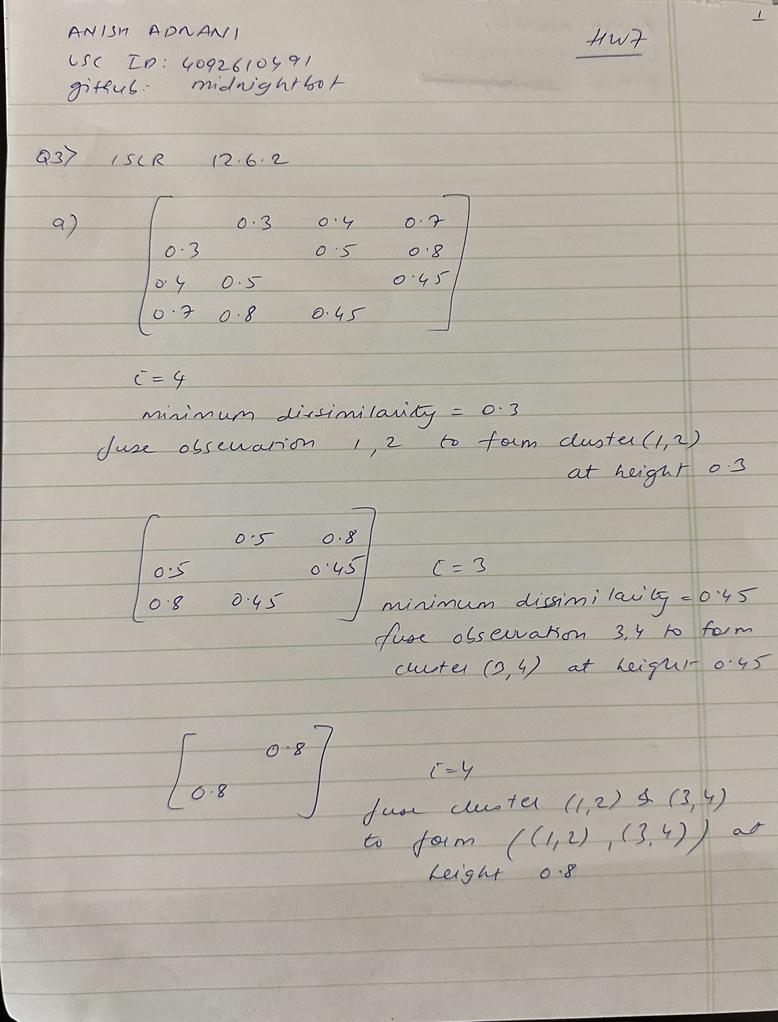

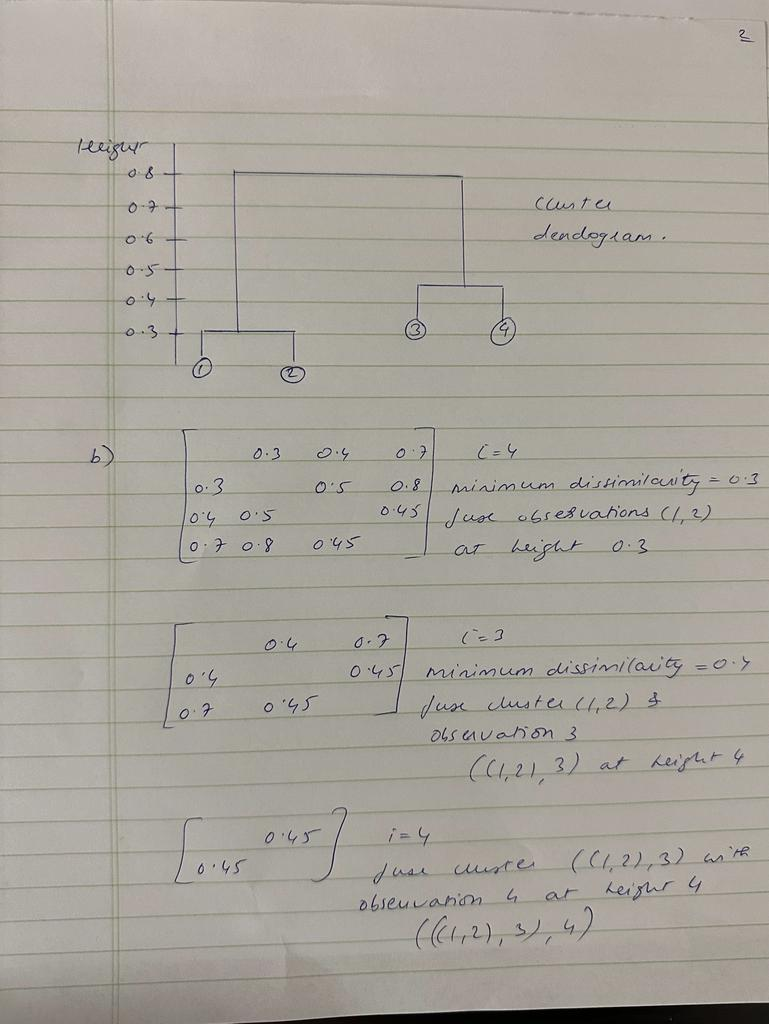

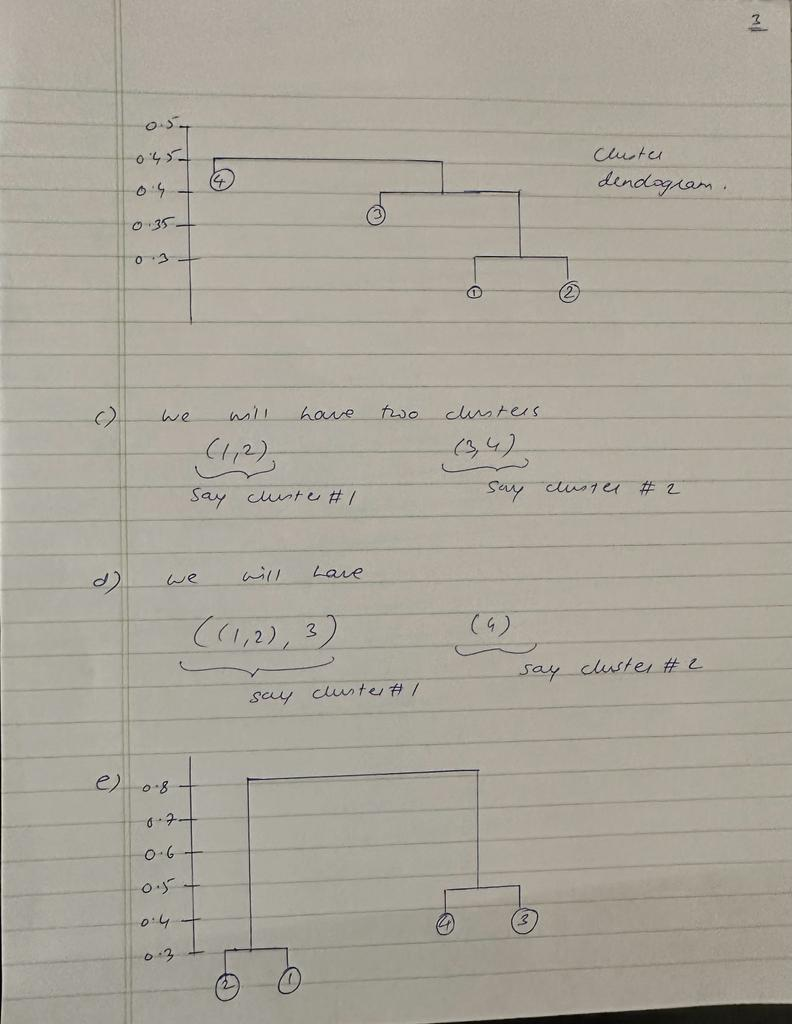